In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Exploration

Binary dataset, 564 of class 1 and 282 of class 2, together 846

([<matplotlib.axis.XTick at 0x7f060f2b1160>,
 [Text(0, 0, 'Class 2'), Text(1, 0, 'Class 1')])

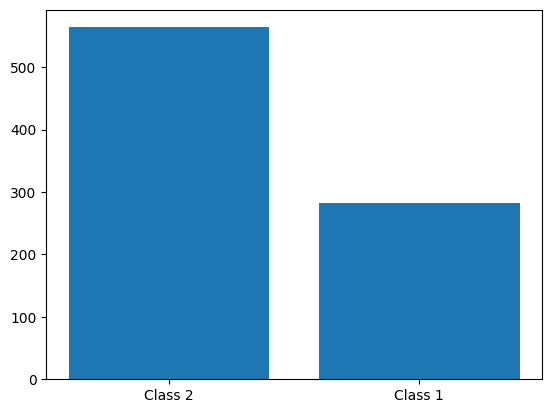

In [3]:
df = pd.read_csv("train.csv")
df.sample()
df.loc[:, "V1":"V3"]
classes = df.loc[:, "Class"].value_counts()
#print(classes, sum(classes))
y_pos = np.arange(len(classes), step=1)
plt.bar(y_pos, classes)
plt.xticks(y_pos, {"Class 1", "Class 2"})

#print(len(np.array(classes) == 2))
#print(len(classes))
#df.columns
#print(df.head)
#print(df.mean)
#print(df.median)

In [39]:
any(df.isnull())    # Missing values
df.isnull().sum()
df = df.fillna(df.mean())   # Fill missing values with the mean values
df.loc[:, "Class"]

3       2
5       2
6       2
7       2
8       2
       ..
1050    1
1052    1
1053    1
1054    1
1055    1
Name: Class, Length: 846, dtype: int64

<AxesSubplot: xlabel='V5', ylabel='V27'>

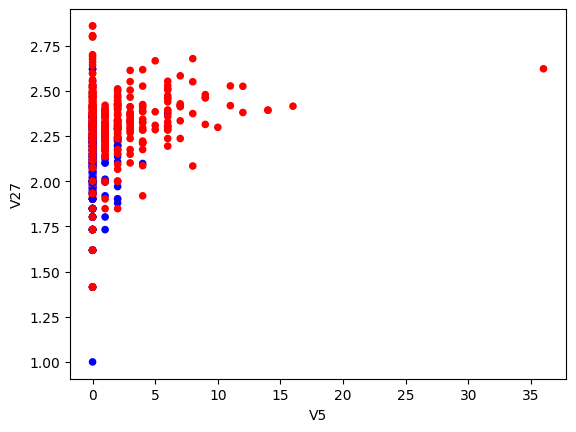

In [103]:
df.describe()
df.fillna(0)
colors = ["red" if c == 1 else "blue" for c in df["Class"]]
df.plot.scatter(x="V5", y="V27", c=colors)

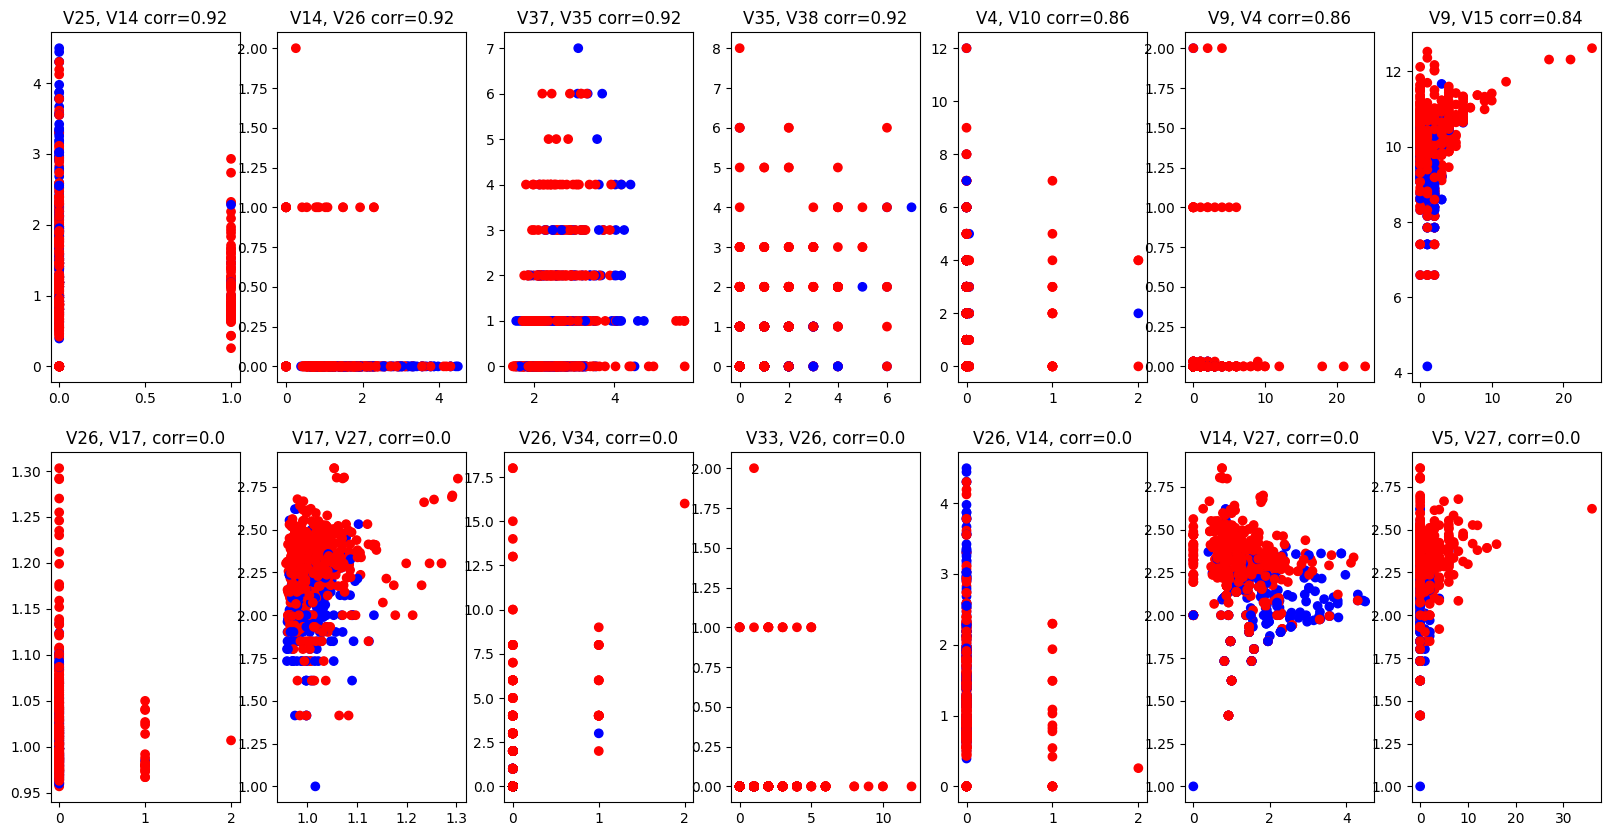

In [198]:
corr = abs(df.corr())   # Only need the magnitude

corr = np.array(corr)   # Convert to numpy array
corr = corr[~np.eye(corr.shape[0], dtype=bool)].reshape(corr.shape[0], -1)  # Remove diagonal elements
corr = pd.DataFrame(corr) # Convert back to dataframe

corr = corr.unstack().sort_values(ascending=False)  # Convert to Series and sort

corr = corr.reset_index()   # Reset labels
corr.columns = ["feature1", "feature2", "corr"] # Rename labels

fig, ax = plt.subplots(2,7, figsize=(20,10))

n = 0
for i in range(len(corr)):
    if n == 7:
        break
    pair = corr.iloc[i]
    if pair[0] and pair[1]:
        ax[0,n].scatter(x=df.loc[:, "V"+str(int(pair[0]))], y=df.loc[:, "V" + str(int(pair[1]))], c=colors)  # Display pairs with highest correlations
        ax[0,n].set_title(f"V{str(int(pair[0]))}, V{str(int(pair[1]))} corr={round(pair[2], 2)}")
        n += 1
   
        
n = 0
for i in range(len(corr)):
    if n >= 7:
        break
    
    pair = corr[::-1].iloc[i]
    if pair[0] and pair[1]:
        ax[1,n].scatter(x=df.loc[:, "V"+str(int(pair[0]))], y=df.loc[:, "V" + str(int(pair[1]))], c=colors)  # Display pairs with lowest correlations
        ax[1,n].set_title(f"V{str(int(pair[0]))}, V{str(int(pair[1]))}, corr={round(pair[2], 2)}")
        
        n += 1

In [168]:
corr

,feature1,feature2,corr
0,25,14,0.919547
1,14,26,0.919547
2,0,26,0.916709
3,25,0,0.916709
4,37,35,0.916597
...,...,...,...
1717,26,14,0.000283
1718,33,26,0.000232
1719,26,34,0.000232
1720,17,27,0.000228


In [ ]:
#